# comparison between difference unsupervised algorithms

Created on Tue Jan 15 14:50:52 2019

@author: Perel Yehuda


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

# load data 
url = r"C:\Users\Lenovo Legion Y520\Desktop\Machine Learning\tutorials\unsuprvised\sumerize excesis\Wholesale customers data.csv"
data = pd.read_csv(url)


data = pd.get_dummies(data, columns=['Channel', 'Region'])
X = data.values
normalize_x_col = normalize(X[:,:-5],axis=0)
X = np.column_stack([normalize_x_col, X[:,-5:]])


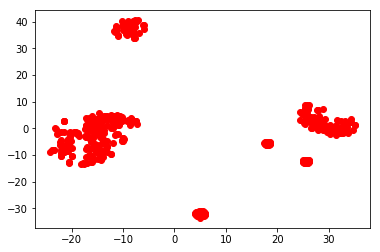

In [6]:

# look at data with tsne
from sklearn.manifold import TSNE
X_2D_tsne = TSNE(n_components=2).fit_transform(X)
X_2D_tsne.shape

plt.scatter(X_2D_tsne[:, 0], X_2D_tsne[:, 1], c="r")


### Execution the algorithms
Cluster the data using:

a. k-means

b. Gmm

c. DBSCAN

d. Hierarchical clustering - agglomerative


In [8]:

#k-means
from sklearn.cluster import KMeans
model_KMeans = KMeans(n_clusters = 6, init='random', max_iter=3000).fit(X)
labels_KMeans = model_KMeans.predict(X)

# Gmm
from sklearn.mixture import GaussianMixture
model_gmm = GaussianMixture(n_components = 6).fit(X)
labels_gmm = model_gmm.predict(X)

# DBSCAN
from sklearn.cluster import DBSCAN
model_DBSCAN = DBSCAN(eps = 0.05, min_samples = 5).fit(X)
labels_DBSCAN = model_DBSCAN.fit_predict(X)

# Hierarchical clustering - agglomerative
from sklearn.cluster import AgglomerativeClustering
model_Hierarchical = AgglomerativeClustering(n_clusters = 6).fit(X)
labels_Hierarchical = model_Hierarchical.labels_ 

clusters_labels = [labels_KMeans, labels_gmm, labels_DBSCAN, labels_Hierarchical]



### compare the qaulity of the classification by the diffrence 

silhouette value:
The best value is 1 and the worst value is -1. 
Values near 0 indicate overlapping clusters. 
Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.


In [9]:

from sklearn.metrics import silhouette_score
silhouettes = []
for labels in clusters_labels:
    silhouettes.append(silhouette_score(X, labels, metric='euclidean'))

clusters_names = ["KMeans", "gmm", "DBSCAN", "Hierarchical"]
scores = list(zip(clusters_names,silhouettes))
print(scores)

[('KMeans', 0.939411796044859), ('gmm', 0.939411796044859), ('DBSCAN', 0.7229070161200554), ('Hierarchical', 0.939411796044859)]


### Present the clustering by each algorithm


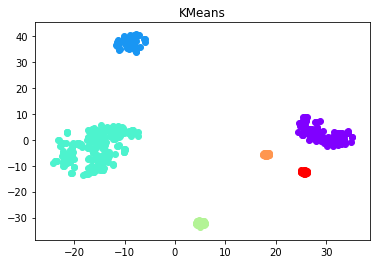

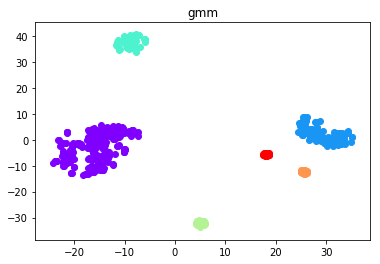

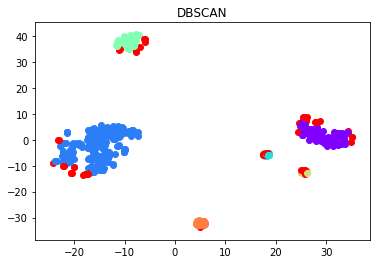

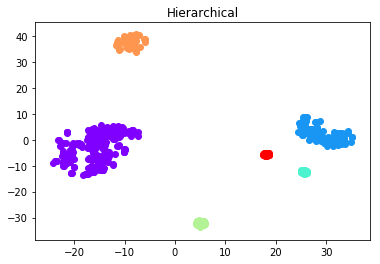

In [10]:

import matplotlib.pyplot as plt
import matplotlib.axes as axe

import matplotlib.cm as cm
def printing(labels, cluster_name):
    plt.title(cluster_name)
    color=cm.rainbow(np.linspace(0,1,len(set(labels))))
    labels_as_color = dict(zip(set(labels),color))
    for i, label in enumerate(labels):
        plt.scatter(X_2D_tsne[i,0], X_2D_tsne[i,1], c = labels_as_color[label])
    
def printing_all(clusters_labels,clusters_names):
    for cluster_idx, labels in enumerate(clusters_labels):
        printing(labels,clusters_names[cluster_idx])
        plt.show()
        
printing_all(clusters_labels,clusters_names)
